<h1>Análisis de datos con Python</h1>

<h2>Titanic</h2>

<img src="https://upload.wikimedia.org/wikipedia/commons/3/31/TitanicBeken.jpg" alt="Titanic">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython import display
import seaborn as sns

df = pd.read_csv("titanic.csv")

In [2]:
print(df.shape, "\n")
print(df.columns,"\n")

(891, 12) 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<p>Para visualizar un ejemplo del archivo:</p>
<ol>
 <li>df</li>
 <li>df.head()</li>
 <li>df.tail()</li>
</ol>

In [5]:
df = df.set_index("PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<hr>

<h3>Supervivencia</h3>

In [57]:
sobrevivientes = df.loc[df["Survived"]==1,:]
sobrevivientes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [31]:
cantidad_pasajeros = len(df.index)
cantidad_sobrevivientes = df.loc[:,"Survived"].sum()

print(f"El titanic tuvo {cantidad_pasajeros} pasajeros, de los cuales {cantidad_sobrevivientes} pudieron sobrevivir a la tragedia.")

El titanic tuvo 891 pasajeros, de los cuales 342 pudieron sobrevivir a la tragedia.


<h4>Según el sexo de los pasajeros</h4>

In [63]:
df.groupby(["Sex"])[[ "Survived"]].sum()

,Survived
Sex,
female,233
male,109


In [84]:
cantidad_sobrevivientes_h = df.loc[(df["Sex"]=="male"),["Survived"]].sum()
cantidad_sobrevivientes_m =df.loc[(df["Sex"]=="female"),["Survived"]].sum()

print(f"Hubo {cantidad_sobrevivientes} sobrevivientes:")
print(f"{cantidad_sobrevivientes_h[0]} fueron hombres y {cantidad_sobrevivientes_m[0]} fueron mujeres.")

Hubo 342 sobrevivientes:
109 fueron hombres y 233 fueron mujeres.


<AxesSubplot:xlabel='Sex', ylabel='count'>

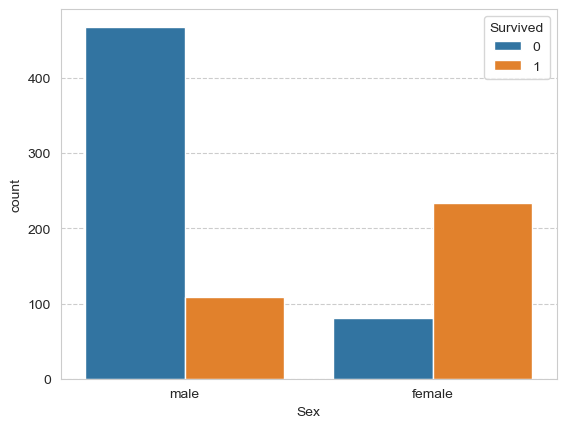

In [93]:
# Count plot
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.countplot(x = df["Sex"], hue = df["Survived"])

Text(0.5, 1.0, 'Sobrevivientes según el sexo')

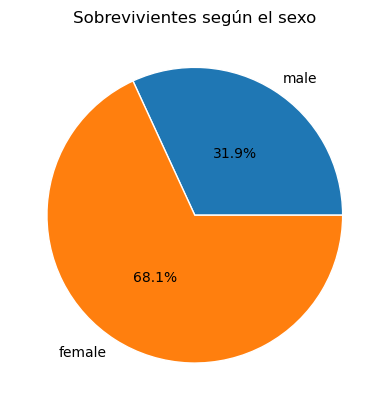

In [86]:
# Data
sexs = df.loc[:,"Sex"].unique()
value = pd.concat([cantidad_sobrevivientes_h, cantidad_sobrevivientes_m])

# Pie chart

fig, ax = plt.subplots()
ax.pie(value, labels = sexs, autopct = '%1.1f%%', pctdistance = 0.5, wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title("Sobrevivientes según el sexo")
# plt.show() 


<h3>Según la edad de los pasajeros</h3>

In [62]:
df.loc[(df["Survived"]==1), :].groupby(["Sex"])[[ "Age"]].mean().round()

,Age
Sex,
female,29.0
male,27.0


In [83]:
promedioedad_sobrevivientes_h = df.loc[(df["Survived"]==1) & (df["Sex"]=="male"), ["Age"]].mean()
promedioedad_sobrevivientes_m = df.loc[(df["Survived"]==1) & (df["Sex"]=="female"), ["Age"]].mean()

print(f"El promedio de edad de los hombres que sobrevivieron fue de {round(promedioedad_sobrevivientes_h[0])} años.")
print(f"El promedio de edad de las mujeres que sobrevivieron fue de {round(promedioedad_sobrevivientes_m[0])} años.")

El promedio de edad de los hombres que sobrevivieron fue de 27 años.
El promedio de edad de las mujeres que sobrevivieron fue de 29 años.


<BarContainer object of 2 artists>

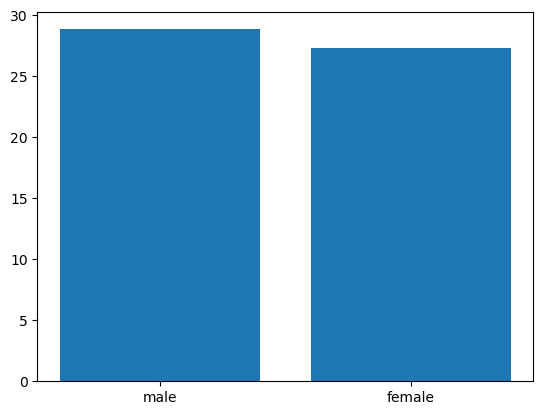

In [92]:
# Data
x = sexs
y = df.loc[(df["Survived"]==1), :].groupby(["Sex"])[[ "Age"]].mean().to_numpy().flatten()

# Bar plot
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
# plt.show() 


<hr>

<h3>Según la clase de los pasajeros</h3>

In [15]:
df.loc[(df["Survived"]==1), ["Pclass", "Survived"]].groupby(["Pclass"]).sum()

,Survived
Pclass,
1,136
2,87
3,119


Text(0.5, 1.0, 'Cantidad de sobrevivientes según la clase')

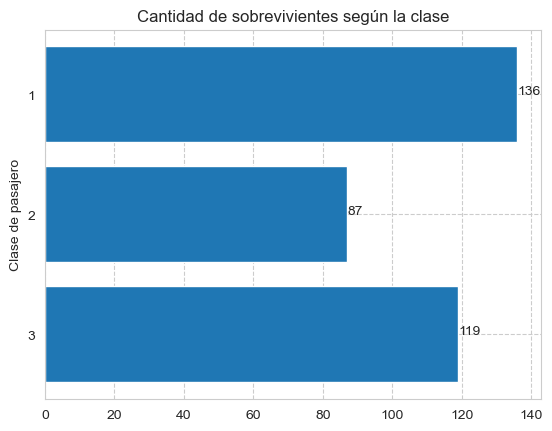

In [61]:
# Data
x = df["Pclass"].sort_values(ascending=False).unique().astype('str')
y = df.loc[(df["Survived"]==1), ["Pclass", "Survived"]].groupby(["Pclass"]).sum().to_numpy().flatten()[::-1]

# Bar plot
fig, ax = plt.subplots()
ax.barh(x, width = y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
ax.set_ylabel('Clase de pasajero')
ax.set_title('Cantidad de sobrevivientes según la clase')

# plt.show()

<h3>Según clase y sexo de los pasajeros</h3>

In [64]:
df.groupby(["Pclass","Sex"])[["Pclass", "Sex", "Survived"]].sum()

Pclass  Survived
Pclass Sex                     
1      female      94        91
       male       122        45
2      female     152        70
       male       216        17
3      female     432        72
       male      1041        47

<AxesSubplot:xlabel='Sex', ylabel='count'>

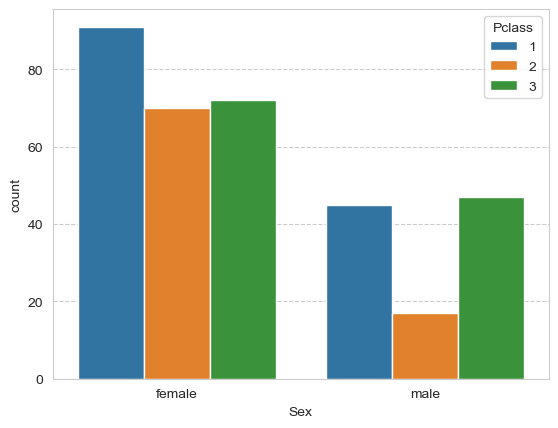

In [54]:
# Count plot
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.countplot(x = sobrevivientes["Sex"], hue = df["Pclass"])

<hr>